#1.단항 논리 회기 실습

* 논리회귀 (Logistic Regrssion)
* 분류를 할 때 사용하며 선형 회귀 공식으로부터 나왔기 때문에  논리 회귀라는 이름을 붙여짐

![](https://i.imgur.com/nE29yVL.png)
> 직선 하나(선형회귀)를 사용해서 예측한다면 제대로 예측할 수 없음(정확도가 떨어짐)

![](https://i.imgur.com/guvMfkf.png)
>Sigmoid 함수(Logistic 함수)를 사용하여 정확도를 높임

### Sigmosid 함수
-  예측값을 0에서 1사이 값이 되도록 만듬
* 0에서 1사이의 연속된 값을 출력으로 하기 때문에 보통 0.5를 기준으로 구분






In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


torch.manual_seed(10)

In [66]:
X_train = torch.FloatTensor([[0],[1],[3],[5],[9],[11],[15],[20]])
y_train = torch.FloatTensor([[0],[0],[0],[0],[0],[1],[1],[1]])

print(X_train.shape)
print(y_train.shape)

torch.Size([8, 1])
torch.Size([8, 1])


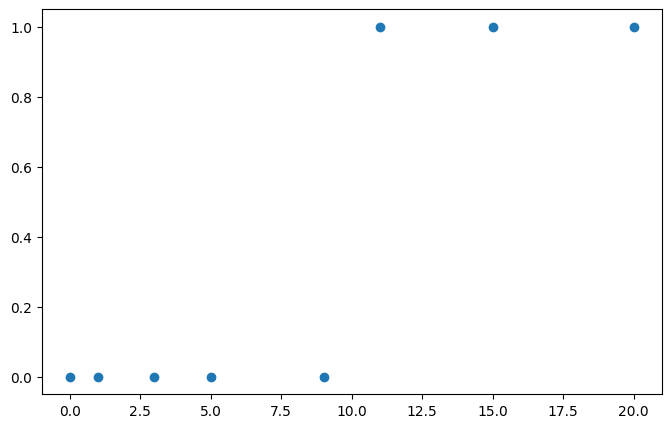

In [67]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train)

![](https://i.imgur.com/6NsfKMa.png)

In [68]:
#Sequential 합쳐주는애
model = nn.Sequential(
    nn.Linear(1,1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [69]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


### 비용 함수
* 논리 회귀에서는 nn.BCELoss() 함수를 사용하여 Loss를 계산
* Binary Cross Entropy(BCE)

<img src="https://i.imgur.com/tvCuEmh.png" width="600px">

In [70]:
y_pred = model(X_train)
y_pred

tensor([[0.4914],
        [0.4705],
        [0.4290],
        [0.3885],
        [0.3124],
        [0.2776],
        [0.2156],
        [0.1530]], grad_fn=<SigmoidBackward0>)

In [71]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(0.9290, grad_fn=<BinaryCrossEntropyBackward0>)

In [72]:
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [73]:
# 학습(Training) (반복 훈련을 해야한다!)
# 반복 훈련을 하면서 틀린 W,b를 수정하여 오차를 계속 줄여나감
# epochs: 반복 훈련 횟수
epochs = 10000

for epoch in range(epochs + 1):

  y_pred = model(X_train)
  loss = nn.BCELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 0.929007
Epoch 100/100 Loss: 0.568484
Epoch 200/200 Loss: 0.519625
Epoch 300/300 Loss: 0.479047
Epoch 400/400 Loss: 0.445106
Epoch 500/500 Loss: 0.416481
Epoch 600/600 Loss: 0.392129
Epoch 700/700 Loss: 0.371230
Epoch 800/800 Loss: 0.353142
Epoch 900/900 Loss: 0.337362
Epoch 1000/1000 Loss: 0.323490
Epoch 1100/1100 Loss: 0.311210
Epoch 1200/1200 Loss: 0.300268
Epoch 1300/1300 Loss: 0.290460
Epoch 1400/1400 Loss: 0.281618
Epoch 1500/1500 Loss: 0.273608
Epoch 1600/1600 Loss: 0.266315
Epoch 1700/1700 Loss: 0.259647
Epoch 1800/1800 Loss: 0.253526
Epoch 1900/1900 Loss: 0.247885
Epoch 2000/2000 Loss: 0.242669
Epoch 2100/2100 Loss: 0.237830
Epoch 2200/2200 Loss: 0.233327
Epoch 2300/2300 Loss: 0.229125
Epoch 2400/2400 Loss: 0.225194
Epoch 2500/2500 Loss: 0.221507
Epoch 2600/2600 Loss: 0.218041
Epoch 2700/2700 Loss: 0.214776
Epoch 2800/2800 Loss: 0.211694
Epoch 2900/2900 Loss: 0.208779
Epoch 3000/3000 Loss: 0.206016
Epoch 3100/3100 Loss: 0.203395
Epoch 3200/3200 Loss: 0.200902
E

In [74]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5564]], requires_grad=True), Parameter containing:
tensor([-5.3388], requires_grad=True)]


In [75]:
X_test = torch.FloatTensor([[2.5],[15.5]])
y_pred = model(X_test)
print(y_pred)

tensor([[0.0189],
        [0.9639]], grad_fn=<SigmoidBackward0>)


In [76]:
# 임계치 설정하기
# 0.5보다 크거나 같드면 1
# 0.5보다 작으면 0

y_bool = (y_pred >= 0.5).float()
print(y_bool)


tensor([[0.],
        [1.]])


#2.다항 논리 회귀 실습

In [77]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [0, 0, 0, 1, 1, 1, 2, 2]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

print(x_train)
print(y_train)

tensor([[1., 2., 1., 1.],
        [2., 1., 3., 2.],
        [3., 1., 3., 4.],
        [4., 1., 5., 5.],
        [1., 7., 5., 5.],
        [1., 2., 5., 6.],
        [1., 6., 6., 6.],
        [1., 7., 7., 7.]])
tensor([0, 0, 0, 1, 1, 1, 2, 2])


In [78]:
model = nn.Sequential(
    nn.Linear(4,3)
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [79]:
y_pred = model(x_train)
print(y_pred)

tensor([[-0.1358,  1.5655, -0.0104],
        [-1.0986,  1.3559,  0.5590],
        [-1.4625,  1.2105,  0.7214],
        [-2.3103,  1.4702,  1.2348],
        [-1.0576,  3.7047,  0.7548],
        [-1.7209,  1.1885,  1.0922],
        [-1.5469,  3.1835,  1.0722],
        [-1.8061,  3.6010,  1.2775]], grad_fn=<AddmmBackward0>)


In [80]:
# 다항 논리 회귀에서는 BCELoss() 대신 CrossEntropyLoss()을 사용
# 소프트맥스 함수가 포함 되어 있다. ( 클래스의 갯수 만큼 확률을 내뿜어주는 함수)
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(1.7613, grad_fn=<NllLossBackward0>)


In [81]:
optimizer = optim.SGD(model.parameters(),lr=0.1)

In [82]:
# 학습(Training) (반복 훈련을 해야한다!)
# 반복 훈련을 하면서 틀린 W,b를 수정하여 오차를 계속 줄여나감
# epochs: 반복 훈련 횟수
epochs = 1000

for epoch in range(epochs + 1):

  y_pred = model(x_train)
  loss = nn.CrossEntropyLoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 1.761291
Epoch 100/100 Loss: 0.633731
Epoch 200/200 Loss: 0.550764
Epoch 300/300 Loss: 0.497095
Epoch 400/400 Loss: 0.453218
Epoch 500/500 Loss: 0.413998
Epoch 600/600 Loss: 0.377086
Epoch 700/700 Loss: 0.340971
Epoch 800/800 Loss: 0.304561
Epoch 900/900 Loss: 0.268060
Epoch 1000/1000 Loss: 0.242054


In [83]:
x_test = torch.FloatTensor([[1,2,5,6]])
y_pred = model(x_test)
print(y_pred)

tensor([[-4.9985,  3.4779,  2.0804]], grad_fn=<AddmmBackward0>)


In [84]:
# 예측값과 확률 구하기
#Softmax(차원)
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[1.6701e-04, 8.0166e-01, 1.9817e-01]], grad_fn=<SoftmaxBackward0>)

In [85]:
print(f'0일 확률: {y_prob[0][0]:.2f}')
print(f'1일 확률: {y_prob[0][1]:.2f}')
print(f'2일 확률: {y_prob[0][2]:.2f}')

0일 확률: 0.00
1일 확률: 0.80
2일 확률: 0.20


In [86]:
torch.argmax(y_prob, axis=1)

tensor([1])

#3.와인 품종 예측해보기
- sklearn.datasets.load_wine 데이터셋은 이탈리아의 같은 지역에서 재배된 세가지 다른 품종으로 만든 와인을 화학적으로 분석한 결과이다.


## 와인데이터셋 문제
* 13개의 성분을 분석하여 어떤 와인인지 맞춰보자
* 단, 트레이닝 데이터를 80% 테스트 데이터를 20% 하며, 테스트 데이터의 0번 인덱스가 어떤 와인인지 출력하고 테스트 정확도도 출력

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


torch.manual_seed(10)

In [88]:
from sklearn.datasets import load_wine

In [89]:
# 데이터셋 불러오기
#data와 target 데이터프레임과 시리즈로 만들기
x_data, y_data = load_wine(return_X_y=True, as_frame=True)

In [90]:
x_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [91]:
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [92]:
x_data = torch.FloatTensor(x_data.values)
y_data = torch.LongTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)

torch.Size([178, 13])
torch.Size([178])


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# 원핫 인코딩 '타겟'값을 원핫인코딩 0,1,2
y_one_hot = nn.functional.one_hot(y_data, num_classes=3).float()

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_one_hot, test_size=0.2, random_state=10)

In [97]:
model = nn.Sequential(
    nn.Linear(13, 3)
)
# optimizer = optim.SGD(model.parameters(), lr=0.01)  #SGD (확률적 경사 하강법)
optimizer = optim.Adam(model.parameters(), lr=0.01)   #Adam (모멘텀+아다그리드)

epochs = 1000

for epoch in range(epochs + 1):

    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        y_train_index = torch.argmax(y_train, axis=1)
        accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100
        print(f'Epoch { epoch:4d}/{epochs} Loss: {loss:.6f} Accuracy: {accuracy:.2f}%')

Epoch    0/1000 Loss: 26.839283 Accuracy: 54.93%
Epoch  100/1000 Loss: 0.254711 Accuracy: 92.25%
Epoch  200/1000 Loss: 0.153993 Accuracy: 95.77%
Epoch  300/1000 Loss: 0.118395 Accuracy: 97.18%
Epoch  400/1000 Loss: 0.101615 Accuracy: 97.89%
Epoch  500/1000 Loss: 0.090044 Accuracy: 97.89%
Epoch  600/1000 Loss: 0.081406 Accuracy: 97.89%
Epoch  700/1000 Loss: 0.074639 Accuracy: 97.89%
Epoch  800/1000 Loss: 0.069118 Accuracy: 97.89%
Epoch  900/1000 Loss: 0.064465 Accuracy: 97.89%
Epoch 1000/1000 Loss: 0.060444 Accuracy: 97.89%


#4.경사하강법의 종류

###4-1.배치 경사 하강법
* 가장 기본적인 경사 하강법(Vanilla Gradient Descent)
* 데이터셋 전체를 고려하여 손실함수를 계산
* 한번의 Epoch에 모든 파라미터 업데이트를 단 한번만 수행한다.
* Batch의 개수와 lteration은 1이고 Batch size는 전체 데이터의 개수
* 파라미터 업데이트 할때 한번에 전체 데이터셋을 고려하기 때문에 모델 학습 시 많은 시간과 메모리가 필요하다는 단점이있다.


###4-2.확률적 경사 하강법
* 확률적 경사 하강법(Stochastic Gradient Descent)은 배치 경사 하강법이 모델학습시 많은 시간과 메모리가 필요하다는 단점을 개선하기 위해 제안된 기법
* Batch size를 1로 설정하여 파라미터를 업데이트 하기 때문에 배치 경사 하강법보다 훨씬 빠르고 적은 메모리로 학습이 진행된다.
* 파라미터 값의 업데이트 폭이 불안정하기 때문에 정확도가 낮은 경우가 생길수 있음.

###4-3.미니 배치 경사 하강법
* 미니 배치 경사 하강법(Min-Batch Gradient Descent)은 Batch size가 1도 전체 데이터 개수도 아닌 경우
* 배치 경사 하강법보다 모델학습 속도가 빠르고, 확률적 경사 하강법보다 안정적인 장점이 있음
* 딥러닝 분야에서 가장 많이 활용되는 경사 하강법
* 일반적으로 Batch size를 32,64,128과 같이 2의 n제곱에 해당하는 값으로 사용하는게 보편적이다.

#5.경사 하강법의 여러가지 기술들

###5-1.확률적 경사 하강법(SGD)
* 매개변수값을 조정시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법

###5-2.모멘텀(Momentum)
* 관성이라는 물리학의 법칙을 응용한 방법
* 경사 하강법에 관성을 더해줌
* 접선의 기울기에 한 시점 이전의 접선의 기울기값을 일정한 비율만큼 반영
* 언덕에서 공이 내려올 때 중간의 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있음

###5-3.아다그라드(Adagrad)
* 모든 매개변수에 동일한 학습률(Learning rate)을 적용하는 것은 비효율적이라는 생각에서 만들어진 학습방법
* 처음에는 크게 학습하다가 조금씩 작게 학습시킨다.


###5-4.아담(Adam)
* 모멘텀 + 아다그라드

In [100]:
y_prob = model(x_test)
y_prob[:5]

tensor([[ -81.7353,  -77.5695,  -83.8587],
        [ -49.0445,  -41.1961,  -49.2887],
        [ -86.2230,  -87.6400,  -92.1615],
        [ -57.9107,  -50.3575,  -59.3157],
        [-107.2299, -113.2044, -113.2305]], grad_fn=<SliceBackward0>)

In [101]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[:5]

tensor([[0.2165, 0.5698, 0.2136],
        [0.2121, 0.5759, 0.2121],
        [0.5017, 0.2730, 0.2252],
        [0.2121, 0.5759, 0.2120],
        [0.5743, 0.2129, 0.2128]], grad_fn=<SliceBackward0>)

In [102]:
print(f'0번 품종일 확률:{y_prob[0][0]:.2f}')
print(f'0번 품종일 확률:{y_prob[0][1]:.2f}')
print(f'0번 품종일 확률:{y_prob[0][2]:.2f}')

0번 품종일 확률:0.22
0번 품종일 확률:0.57
0번 품종일 확률:0.21


In [ ]:
y_pred_index = torch.argmax(y_prob, axis=1)
y_test_index = torch.argmax(y_test, axis=1)

accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100

print(f'테스트 정확도는 {accuracy:.2f}% 입니다.')